In [2]:
import altair as alt

In [5]:
import pandas as pd

In [6]:
matches = pd.read_csv('/Users/vpranay/Desktop/matches.csv')

In [7]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


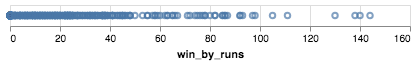

In [9]:
alt.Chart(matches).mark_point().encode(x='win_by_runs')

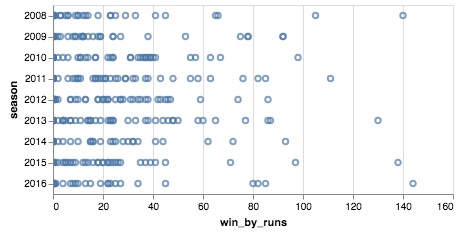

In [12]:
alt.Chart(matches).mark_point().encode(
    x='win_by_runs',
    y='season:O'
).interactive()

In [66]:
matches_per_season = alt.Chart(matches).mark_bar().encode(
    x='season',
    y='count()',
    tooltip='count()'
)

In [47]:
matches[matches['season']==2011]['team1'].nunique()

10

In [33]:
matches.query('season in [2013]')['team1'].nunique()

9

In [31]:
matches.query('season in [2008,2009,2010,2014,2015]')['team1'].nunique()

9

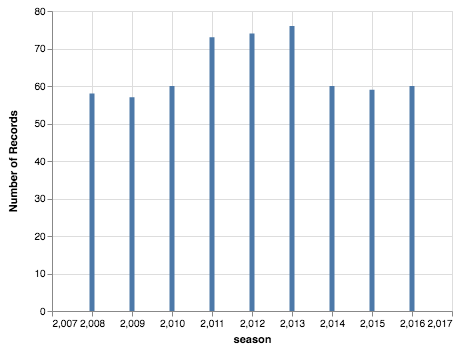

In [67]:
alt.Chart.from_dict(matches_per_season.to_dict())

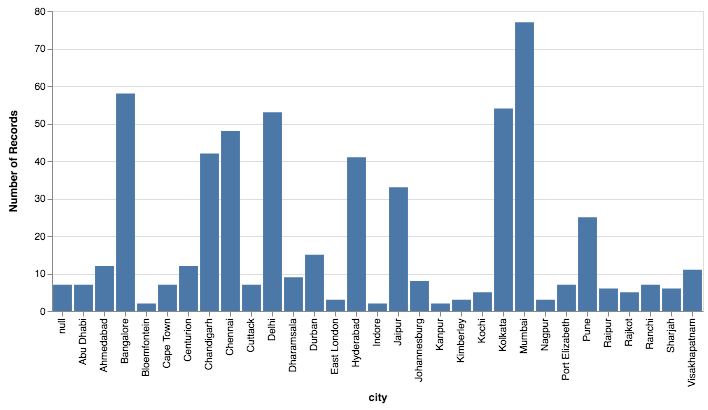

In [75]:
city_wise_matches = alt.Chart(matches).mark_bar().encode(
    x=alt.X('city'),
    y=alt.Y('count()'),
    tooltip='count()'
)
city_wise_matches

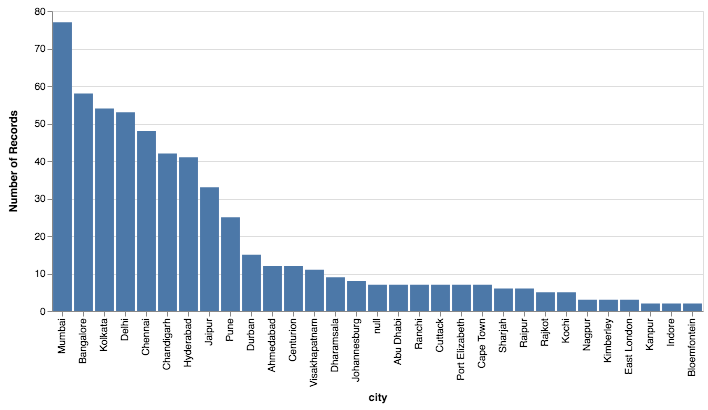

In [77]:
city_wise_matches = alt.Chart(matches).mark_bar().encode(
    x=alt.X('city',sort=alt.SortField(op="count", order="descending")),
    y=alt.Y('count()'),
)
city_wise_matches

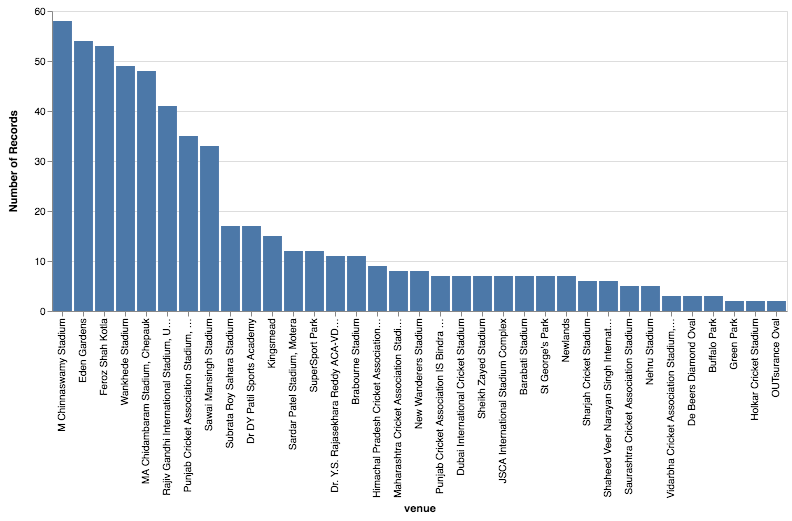

In [88]:
venue_wise_matches = alt.Chart(matches).mark_bar().encode(
    x=alt.X('venue',sort=alt.SortField(op="count", order="descending")),
    y=alt.Y('count()'),
    tooltip='city'
).interactive()
venue_wise_matches

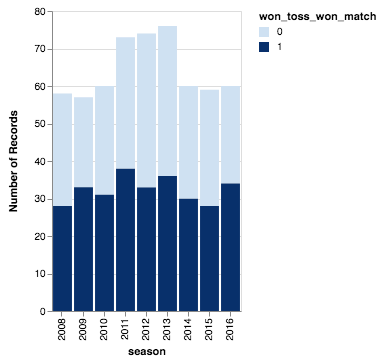

In [95]:
from altair.expr import datum, if_
team_winningtoss_winsmatch = alt.Chart(matches).mark_bar().encode(
    x='season:O',
    y='count()',
    color='won_toss_won_match:O'
).transform_calculate(
    won_toss_won_match = if_(datum.toss_winner==datum.winner, 1, 0)
)
team_winningtoss_winsmatch

In [129]:
matches['won_toss_won_match']= matches.apply(lambda x: 1 if x['toss_winner']==x['winner'] else 0,axis=1)

In [130]:
matches.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,won_toss_won_match
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,0
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,1
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN,0
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN,0
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN,0
5,6,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN,0
6,7,2008,Hyderabad,2008-04-22,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Delhi Daredevils,0,9,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba,NaN,0
7,8,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN,0
8,9,2008,Hyderabad,2008-04-24,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,MR Benson,NaN,1
9,10,2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba,NaN,0


In [197]:
groupedbyseason = matches.groupby(['season'])

In [214]:
won_percentage = groupedbyseason['won_toss_won_match'].sum()/groupedbyseason['id'].count()

In [216]:
type(won_percentage)

pandas.core.series.Series

In [217]:
df_won_percentage= won_percentage.to_frame(name='win_toss_win_match_perc').reset_index()
df_won_percentage

,season,win_toss_win_match_perc
0,2008,0.482759
1,2009,0.578947
2,2010,0.516667
3,2011,0.520548
4,2012,0.445946
5,2013,0.473684
6,2014,0.500000
7,2015,0.474576
8,2016,0.566667


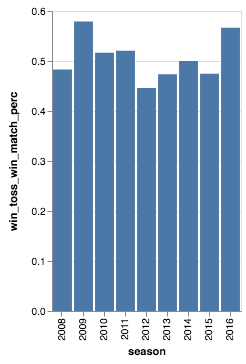

In [218]:
team_winningtoss_winsmatch = alt.Chart(df_won_percentage).mark_bar().encode(
    x='season:O',
    y='win_toss_win_match_perc',
    tooltip='win_toss_win_match_perc'
)
team_winningtoss_winsmatch

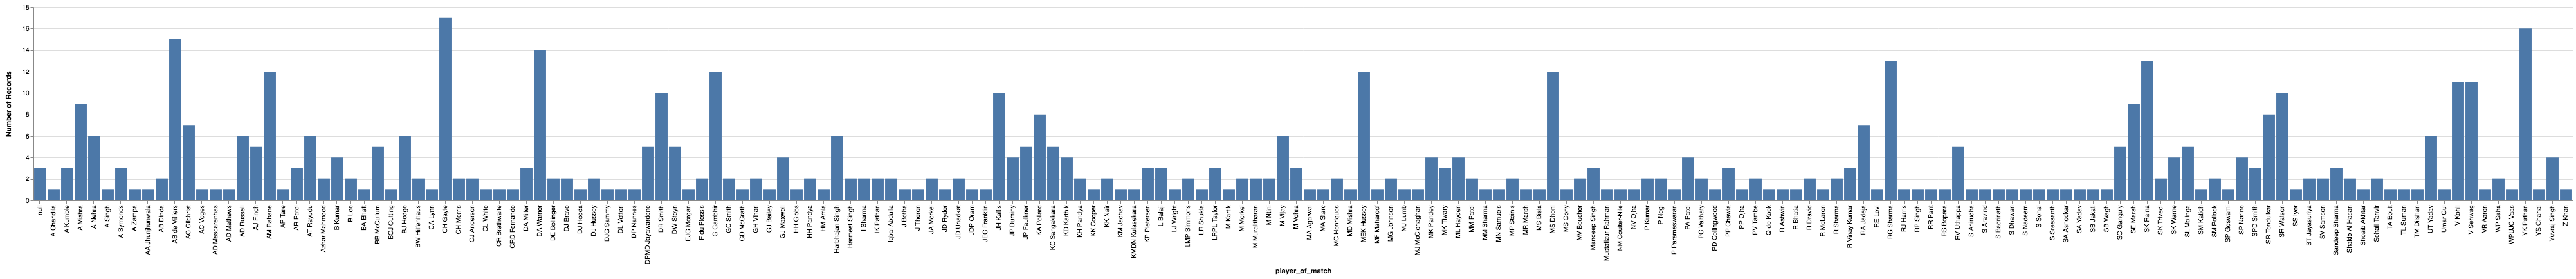

In [225]:
mom = alt.Chart(matches).mark_bar().encode(
    x='player_of_match',
    y='count()'
)
mom.configure_bar(cursor='all-scroll')

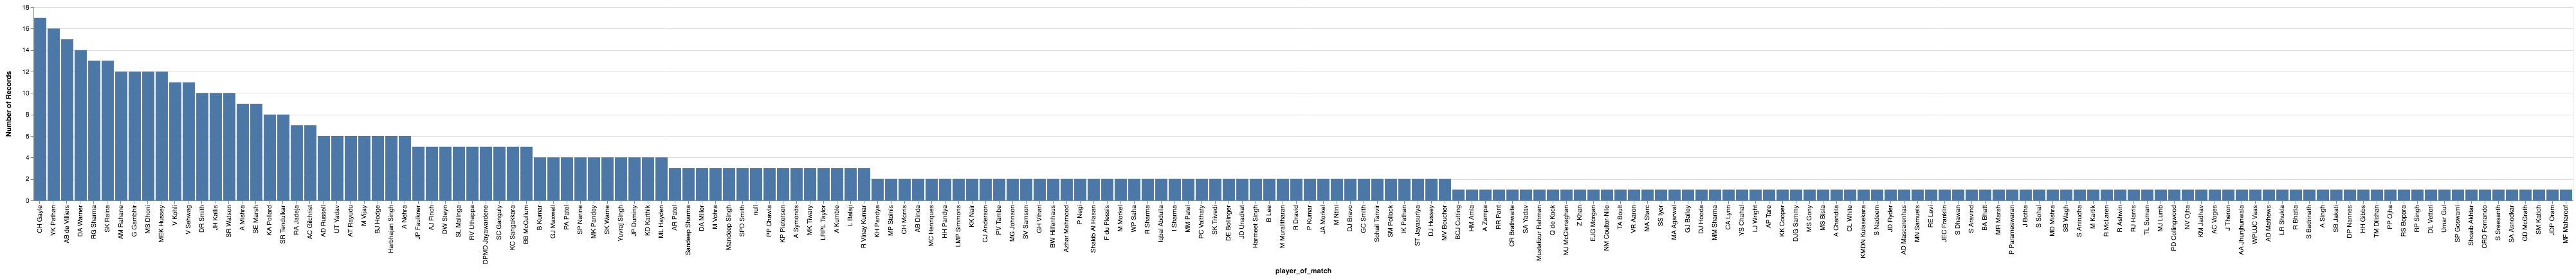

In [229]:
mom.encode(x=alt.X('player_of_match',sort=alt.SortField(op="count", order="descending")))